<a href="https://colab.research.google.com/github/mjbooo/Pr4AI/blob/main/02_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [ ]:
import numpy as np
from matplotlib import pyplot as plt  # Anything can be found in matplotlib.org. Just google it
import sklearn

### Matplotlib Example

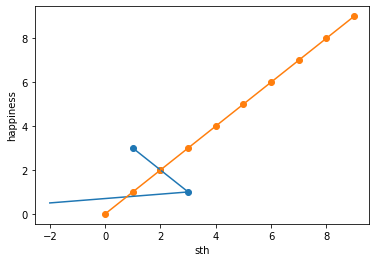

In [ ]:
plt.plot([1,2,3, -2], [3,2,1,0.5])    # plot=line
plt.scatter([1,2,3], [3,2,1]) # scatter=dot
plt.plot(np.arange(10), np.arange(10))
plt.scatter(np.arange(10), np.arange(10))  # can carry multiple mplot
plt.xlabel('sth')
plt.ylabel('happiness')
plt.show()  # colab notebook: automatically plots the graph w/o show, the other ide don't.

In [ ]:
def draw_plot(X, Y, x_sample, y_sample):  
    for i in range(len(X)): # X, Y: go through the list
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

### Drawing a function

<class 'numpy.ndarray'>
<class 'list'>


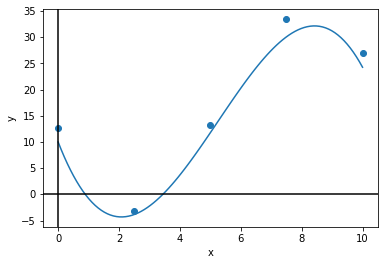

In [ ]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100)
y_line = foo(x_line)
# np,linspace: evenly distributed sample (start, end, #)
print(type(x_line))
print(type([x_line]))
'''
# Quiz: Draw the function foo using x_line
draw_plot([x_line], [foo(x_line)],x_line, foo(x_line)) 
draw_plot([foo(x_line)], [x_line],x_line, foo(x_line))

# Quiz: Sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
x_sample = np.linspace(0, 10, 5)
y_sample = foo(x_sample)
draw_plot([x_line], [foo(x_line)], x_sample, y_sample)
'''


# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize.
x_sample = np.linspace(0, 10, 5)
np.random.seed(seed=0)
y_sample = foo(x_sample)+ np.random.normal(0, 1.5, 5) # list+ list (made by random, not just single integer which would be broadcasted)
draw_plot([x_line], [foo(x_line)], x_sample, y_sample)

### Linear Regression

(5,) [ 0.   2.5  5.   7.5 10. ]
(5, 1) [[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
R^2:0.527995
[ 3.52538115 10.08254324 16.63970533 23.19686742 29.75402952]
(5,)
76.87370064238061


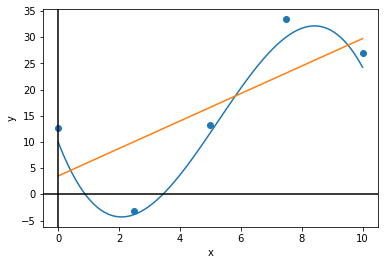

In [ ]:
from sklearn.linear_model import LinearRegression # All sklearn: same pattern to tr & te

# Defining a linear regression model.
lr = LinearRegression() # instantiating the LR class

# Training the linear regression model.
lr.fit(x_sample[:, None], y_sample) # fit= training
# lr.fit(x_sample, y_sample) # fit= training

print(x_sample.shape, x_sample) # w/o None, x_sample causes error (cause it's a single dimensioanl feature). 
print(x_sample[:, None].shape, x_sample[:, None])  # The input should be multi dimensional by adding new axis
# y_sample: already a vector

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print("R^2:%f" % r2)

# Predicting a single data point.
y_hat = lr.predict(x_sample[:, None])
print(y_hat)

# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
MSE=((y_sample - y_hat)**2).mean()
print((y_sample - y_hat).shape)

print(MSE)

# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.

x_line = np.linspace(0, 10, 100)
y_lr= lr.predict(x_line[:,None])
draw_plot([x_line, x_line], [y_line, y_lr],x_sample, y_sample)
# LR: underfitting case

### Polynomial Regression

x_sample_poly [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03]
 [1.00000000e+00 7.50000000e+00 5.62500000e+01 4.21875000e+02
  3.16406250e+03 2.37304688e+04]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04 1.00000000e+05]]


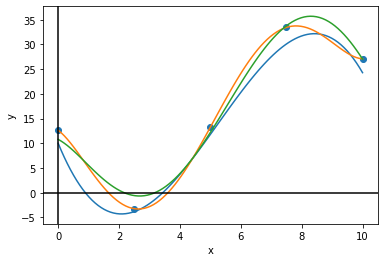

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=5)

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None])
print('x_sample_poly', x_sample_poly)

# Train a linear regression model using the polynomial features.
pr = LinearRegression().fit(x_sample_poly, y_sample)
rr = Ridge(alpha=1).fit(x_sample_poly, y_sample)

# Quiz: Visualize the polynomial regression model, in comparison with foo.
x_line_poly= poly.fit_transform(x_line[:,None])
y_poly=pr.predict(x_line_poly)
y_rr=rr.predict(x_line_poly)
#print(y_poly)

draw_plot([x_line, x_line, x_line], [foo(x_line), y_poly, y_rr], x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?

### Iris Dataset

In [ ]:
data_path = './iris.data'
X = []
y = []

from sklearn.datasets import load_iris
X, y= load_iris(return_X_y=True)
'''
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

with open(data_path, 'r') as fid:
    count = 0
    for line in fid:
        print(line.strip())
X = np.array(X)
y = np.array(y)

# Quiz: Fill the above for loop to load the data into X and y.
'''

"\niris = datasets.load_iris()\nX = iris.data[:, :2]  # we only take the first two features.\ny = iris.target\n\nwith open(data_path, 'r') as fid:\n    count = 0\n    for line in fid:\n        print(line.strip())\nX = np.array(X)\ny = np.array(y)\n\n# Quiz: Fill the above for loop to load the data into X and y.\n"

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# Tr=80%, Te=20%, train_test_split: always gives same split, then randomly choose by using random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 


### Classifiers

In [ ]:
# All ML model in sklearn consists of 3 phases - import, instantiate, fit

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=145)
log.fit(X_train, y_train) 

# Quiz: Import Support Vector Machine, then train SVM
from sklearn.svm import SVC
svm=SVC(kernel='rbf', degree=0, random_state=145)
svm.fit(X_train, y_train)
# kernal: increase the power (capacity) of SVM - choose linear, poly, rbf (infinite dimensional SVM)...

# Quiz: Import Decision Tree, then train DT
from sklearn.tree import DecisionTreeClassifier as DTC
dtc=DTC(max_depth=4, random_state=145)
dtc.fit(X_train, y_train)


# depth: increase the power (capacity) of DT: classify the data into 2**n categories

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=145, splitter='best')

In [ ]:
# Quiz: Use the model's predict() to calculate the test accuracy. (use whole tr set, not first two feature)

# bool -> float (astype('float')) -> mean
# NEVER use the test set to tune the hyperparam.Use validation set

y_log=log.predict(X_test)
y_svm=svm.predict(X_test)
y_dtc=dtc.predict(X_test)

print('y_log',(y_test==y_log).astype('float').mean())
print('y_svm',(y_test==y_svm).astype('float').mean())
print('y_dtc',(y_test==y_dtc).astype('float').mean())

# Another way of using score())
print(log.score(X_test, y_test))
print(svm.score(X_test, y_test))
print(dtc.score(X_test, y_test))

y_log 1.0
y_svm 1.0
y_dtc 1.0
1.0
1.0
1.0


In [ ]:

# Quiz: Use various model options, features, and the score() fuction to compare performance.


(120, 4)


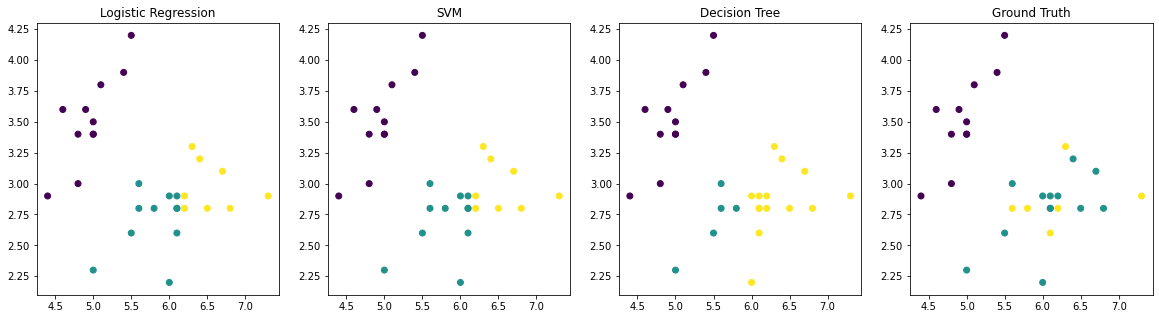

In [ ]:
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Example shown below)

# tensorboard: useful to show training process

# same data pts & different classification: c=y_predict

# matplotlib.mashgrid can show decision boundary. 

print(X_train.shape)  # 120 data, 4 features
log.fit(X_train[:,:2], y_train) # Cause it should be drawn on 2-D graph
svm.fit(X_train[:,:2], y_train)
dtc.fit(X_train[:,:2], y_train)

y_log=log.predict(X_test[:,:2])
y_svm=svm.predict(X_test[:,:2])
y_dtc=dtc.predict(X_test[:,:2])

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')
plt.scatter(X_test[:,0],X_test[:,1],c=y_log)

plt.subplot(142)
plt.title('SVM')
plt.scatter(X_test[:,0],X_test[:,1],c=y_svm)

plt.subplot(143)
plt.title('Decision Tree')
plt.scatter(X_test[:,0],X_test[:,1],c=y_dtc)

plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)